In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Config import api_key
import requests
import json
import time
from citipy import citipy
from scipy.stats import linregress
import scipy.stats as st

In [134]:
print(api_key)

5f02fe7d453b73e3cf07552b2c5cace6


In [135]:
#define query url
temps_unit = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temps_unit}&q="


In [136]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [137]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries =[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['sinnamary',
 'klaksvik',
 'kadoma',
 'sao filipe',
 'cherskiy',
 'saint-philippe',
 'lodwar',
 'kapaa',
 'saint-pierre',
 'kiboga',
 'dikson',
 'marzuq',
 'bluff',
 'atuona',
 'umzimvubu',
 'qaanaaq',
 'luanda',
 'mataura',
 'pimenta bueno',
 'albany',
 'ngukurr',
 'kodiak',
 'sakaiminato',
 'chuy',
 'saleaula',
 'dudinka',
 'ushuaia',
 'kieta',
 'lukovo',
 'bredasdorp',
 'punta arenas',
 'puerto ayora',
 'shingu',
 'ratangarh',
 'aykhal',
 'fairbanks',
 'zhigansk',
 'tasiilaq',
 'kontagora',
 'ahumada',
 'cape elizabeth',
 'mazatlan',
 'illoqqortoormiut',
 'upernavik',
 'hilo',
 'skibbereen',
 'flinders',
 'mount pleasant',
 'kango',
 'grand-santi',
 'rikitea',
 'vaini',
 'barcelos',
 'cayenne',
 'olafsvik',
 'svetlogorsk',
 'kaitangata',
 'geraldton',
 'mys shmidta',
 'arman',
 'mar del plata',
 'severo-kurilsk',
 'barrow',
 'busselton',
 'maceio',
 'arraial do cabo',
 'malwan',
 'dukat',
 'souillac',
 'sobolevo',
 'nizhneyansk',
 'sumbawa',
 'lakatoro',
 'attawapiskat',
 'tuggurt'

In [138]:
#perform API calls.



# empty lists to hold the data
city_1 = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial counts for iterating

count= 0
count_plus_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count > 48:
            count = 1
            count_plus_one += 1
            city_1.append(city)
        else:
            count += 1
            city_1.append(city)
        print(f"Processing Record {count} of Set {count_plus_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n---------------")


Processing Record 1 of Set 1 | sinnamary
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | kadoma
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | lodwar
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | kiboga
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | marzuq
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | atuona
City not found. Skipping...
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | luanda
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | pimenta bueno
Processing Record 19 of Set 1 | albany
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | sakaiminato
Processing Record 22 of Set 1 | chuy
City not found. Skipping...
Processing Record 23 of Set 1 | 

Processing Record 36 of Set 4 | gejiu
Processing Record 37 of Set 4 | fortuna
Processing Record 38 of Set 4 | avarua
Processing Record 39 of Set 4 | sechura
Processing Record 40 of Set 4 | zaragoza
Processing Record 41 of Set 4 | oulainen
Processing Record 42 of Set 4 | thompson
City not found. Skipping...
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | yellowknife
Processing Record 46 of Set 4 | vardo
City not found. Skipping...
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | makakilo city
Processing Record 49 of Set 4 | holzminden
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | bilma
Processing Record 4 of Set 5 | tommot
Processing Record 5 of Set 5 | klyuchi
Processing Record 6 of Set 5 | chunskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 5 | kosh-agach
Processing Record 8 of Set 5 | pontevedra
Cit

Processing Record 26 of Set 8 | aswan
Processing Record 27 of Set 8 | selkirk
Processing Record 28 of Set 8 | lubango
Processing Record 29 of Set 8 | biankouma
Processing Record 30 of Set 8 | kasese
Processing Record 31 of Set 8 | zalantun
Processing Record 32 of Set 8 | zhezkazgan
Processing Record 33 of Set 8 | launceston
Processing Record 34 of Set 8 | baykit
Processing Record 35 of Set 8 | mildura
Processing Record 36 of Set 8 | yatou
Processing Record 37 of Set 8 | melo
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | crowley
Processing Record 40 of Set 8 | paamiut
Processing Record 41 of Set 8 | pevek
Processing Record 42 of Set 8 | sawtell
Processing Record 43 of Set 8 | poum
Processing Record 44 of Set 8 | cocorit
Processing Record 45 of Set 8 | megion
City not found. Skipping...
Processing Record 46 of Set 8 | keshabpur
Processing Record 47 of Set 8 | beyneu
Processing Record 48 of Set 8 | hualmay
Processing Record 49 of Set 8 | bima
Processing Reco

In [139]:
#creating the weather dataframe

weather_df= pd.DataFrame({"City":city_1,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Latitude":lats,
    "Longitude":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds})
weather_df.head(50)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,sinnamary,18,GF,1627416683,73,5.3833,-52.9500,82.45,9.26
1,klaksvik,92,FO,1627416683,96,62.2266,-6.5890,52.72,12.57
2,kadoma,100,JP,1627416683,94,34.7333,135.5833,78.94,1.81
3,sao filipe,100,IN,1627416683,78,20.5113,76.2129,72.93,14.70
4,cherskiy,100,RU,1627416591,83,68.7500,161.3000,36.73,16.46
5,saint-philippe,48,RE,1627416572,83,-21.3585,55.7679,69.35,11.90
6,lodwar,27,KE,1627416684,37,3.1191,35.5973,84.72,8.48
7,kapaa,75,US,1627416304,76,22.0752,-159.3190,84.52,4.00
8,saint-pierre,75,RE,1627416444,79,-21.3393,55.4781,69.44,10.36
9,kiboga,65,UG,1627416684,62,0.9161,31.7742,64.40,2.28


In [140]:
weather_df.to_csv("output_data/cityweather.csv")

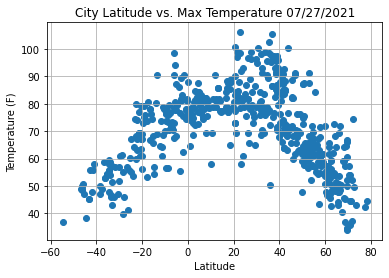

In [141]:
#plot Temperature (F) vs. Latitude





plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], marker = 'o')
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

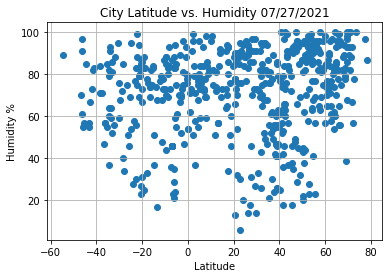

In [142]:
# * Humidity (%) vs. Latitude
plt.scatter(weather_df['Latitude'],weather_df['Humidity'], marker ='o')
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

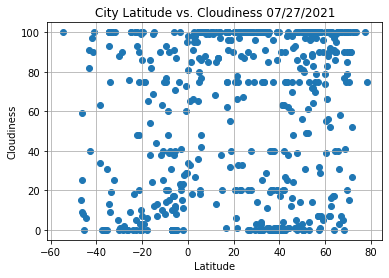

In [143]:
# * Cloudiness (%) vs. Latitude
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'], marker ='o')
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

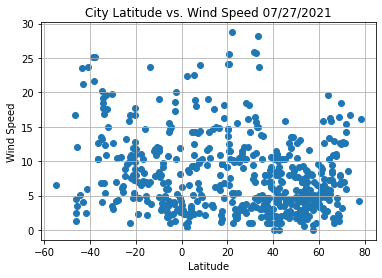

In [144]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'], marker ='o')
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [145]:
#set Northern and Southern hemisphere data frames

northern_df = weather_df.loc[weather_df["Latitude"]> 0,]
southern_df = weather_df.loc[weather_df["Latitude"]< 0,]

In [152]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The regression line Equations is: {line_equation}")

slope:-0.46970526757802644
intercept:91.02014416889827
rvalue (Correlation coefficient):-0.6370839568332602
pandas (Correlation coefficient):-0.64
stderr:0.028557469971890022
The regression line Equations is: y = -0.47x + 91.02


The r-squared is: 0.08498432907249277
In the Nothern Hemisphere the temperature decreases the further away from the equator you get


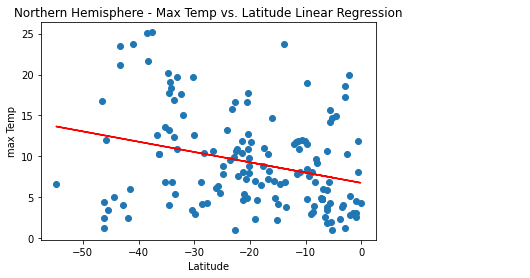

In [174]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('max Temp')
plt.annotate(line_equation,(5,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a negative correlation")
print("In the Nothern Hemisphere the temperature decreases the further away from the equator you get")
plt.show()

In [117]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression line Equations is: {line_equation}")
print(line_equation)

slope:0.7249733453514485
intercept:79.91812001779059
rvalue (Correlation coefficient):0.7027938355014375
pandas (Correlation coefficient):0.7
stderr:0.05730362724615189
y = 0.72x + 79.92


The r-squared is: 0.49391917521882156


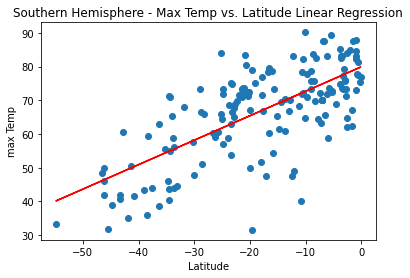

In [118]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('max Temp')
print(f"The r-squared is: {rvalue**2}")
print("In the Southern Hemisphere the temperature increases the further away from the equator you get")
plt.show()

In [119]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression line Equations is: {line_equation}")
print(line_equation)

slope:-0.10112527825156194
intercept:72.92777024246175
rvalue (Correlation coefficient):-0.08954696522340083
pandas (Correlation coefficient):-0.09
stderr:0.05710113573213072
y = -0.1x + 72.93


The r-squared is: 0.0030223289610988953
In the Nothern hemisphere the data set does not show any significant correlation between humidity and latitude


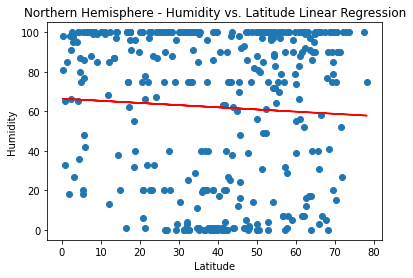

In [159]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print("In the Nothern hemisphere the data set does not show any significant correlation between humidity and latitude")
plt.show()

In [160]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression line Equations is: {line_equation}")
print(line_equation)

slope:-0.09848904295870904
intercept:65.92683174819953
rvalue (Correlation coefficient):-0.0671195354361964
pandas (Correlation coefficient):-0.07
stderr:0.11953989787104032
The regression line Equations is: y = -0.1x + 65.93
y = -0.1x + 65.93


The r-squared is: 0.004505032037170825
In the southern hemisphere the data set does not show any significant correlation between humidity and latitude


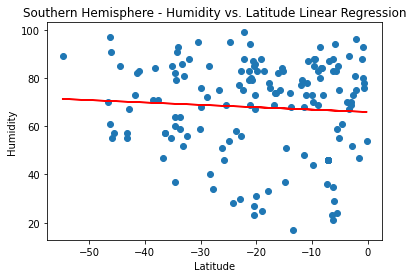

In [161]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print("In the southern hemisphere the data set does not show any significant correlation between humidity and latitude")
plt.show()

In [162]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression line Equations is: {line_equation}")
print(line_equation)

slope:-0.10974672805341494
intercept:66.4212100646038
rvalue (Correlation coefficient):-0.054975712465586975
pandas (Correlation coefficient):-0.05
stderr:0.1001649636430414
The regression line Equations is: y = -0.11x + 66.42
y = -0.11x + 66.42


The r-squared is: 0.016089629301765024
In the Nothern hemisphere the data set does not show any significant correlation between cloudiness and distance from the equator


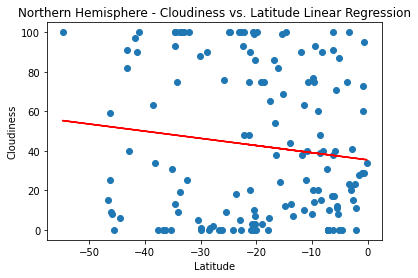

In [165]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print("In the Nothern hemisphere the data set does not show any significant correlation between cloudiness and distance from the equator")
plt.show()

In [167]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression line Equations is: {line_equation}")
print(line_equation)

slope:-0.3623784533681732
intercept:35.455093428304295
rvalue (Correlation coefficient):-0.12684490254545125
pandas (Correlation coefficient):-0.13
stderr:0.231377693529368
The regression line Equations is: y = -0.36x + 35.46
y = -0.36x + 35.46


The r-squared is: 0.016089629301765024
In the southern hemisphere the data set does not show any significant correlation between cloudiness and distance from the equator


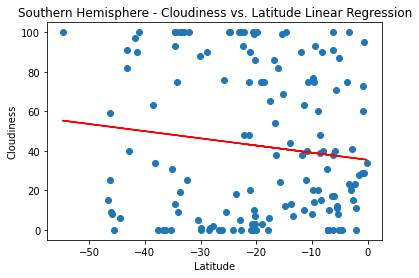

In [168]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print("In the southern hemisphere the data set does not show any significant correlation between cloudiness and distance from the equator")
plt.show()


In [169]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression line Equations is: {line_equation}")
print(line_equation)

slope:-0.03490705355015859
intercept:8.673124216150285
rvalue (Correlation coefficient):-0.13016680462194713
pandas (Correlation coefficient):-0.13
stderr:0.013361481595635535
The regression line Equations is: y = -0.03x + 8.67
y = -0.03x + 8.67


The r-squared is: 0.016943397025488156
In the Nothern hemisphere the data set does not show any significant correlation between Wind speed and distance from the equator


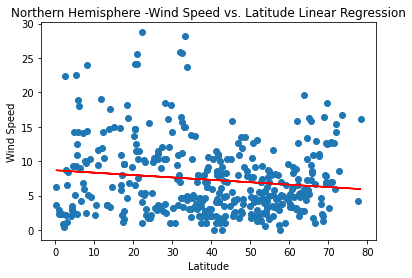

In [171]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere -Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
print("In the Nothern hemisphere the data set does not show any significant correlation between Wind speed and distance from the equator")

plt.show()

In [172]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression line Equations is: {line_equation}")
print(line_equation)


slope:-0.12584175480839974
intercept:6.758548874839054
rvalue (Correlation coefficient):-0.29152071808448327
pandas (Correlation coefficient):-0.29
stderr:0.03371506312361671
The regression line Equations is: y = -0.13x + 6.76
y = -0.13x + 6.76


The r-squared is: 0.08498432907249277
In the Southern hemisphere the data set does not show any significant correlation between Wind speed and distance from the equator


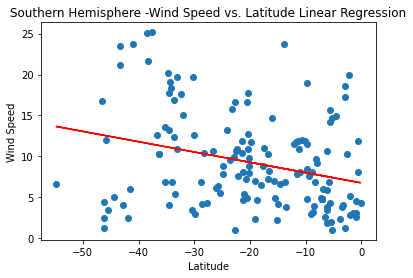

In [173]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere -Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
print("In the Southern hemisphere the data set does not show any significant correlation between Wind speed and distance from the equator")

plt.show()